### Importing Libraries:

In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.svm import OneClassSVM
from numpy.random import seed
import keras
from keras import layers
from keras.layers import Input, Dropout
from keras.layers import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json
from scipy.special import softmax
from sklearn.preprocessing import MinMaxScaler

### Function to Deal with non-numeric-values:

In [2]:
def handle_non_numeric(df):
    # Values in each column for each column
    columns = df.columns.values
    
    for column in columns:
        
        # Dictionary with each numerical value for each text
        text_digit_vals = {}
        
        # Receives text to convert to a number
        def convert_to_int (val):
            
            # Returns respective numerical value for class
            return text_digit_vals[val]
        
        # If values in columns are not float or int
        if df[column].dtype !=np.int64 and df[column].dtype != np.float64:
            
            # Gets values form current column
            column_contents = df[column].values.tolist()
            
            # Gets unique values from current column
            unique_elements = set(column_contents)
            
            # Classification starts at 0
            x=0
            
            for unique in unique_elements:
                
                # Adds the class value for the text in dictionary, if it's not there
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            
            # Maps the numerical values to the text values in columns 
            df[column] = list(map(convert_to_int, df[column]))
    
    return df

In [3]:
main_df = pd.read_csv("Organized_Dataset.csv")
main_df = main_df.drop(['Day', 'Hour', 'Month', 'Date','Minute','Second','timestamp','Mode',"Unnamed: 0"], axis=1)
main_df = handle_non_numeric(main_df)

In [6]:
main_df.head()

,pCut::Motor_Torque,pCut::CTRL_Position_controller::Lag_error,pCut::CTRL_Position_controller::Actual_position,pCut::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Actual_position,pSvolFilm::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Lag_error,pSpintor::VAX_speed
0,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756
1,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756
2,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756
3,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756
4,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756


### Data preprocessing

In [4]:
# Data preprocessing ;
X = main_df


scaler = preprocessing.MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X),
                    columns=main_df.columns,
                    index = main_df.index)

train_percent = 0.15
train_size = int(len(main_df)*train_percent)
X_train = X[:train_size]


### Model building

In [5]:
# Model building ; 

seed(10)

#activation function ;

act_function = "elu"

# Model Layers ; 

autoencoder = keras.Sequential([
    layers.Dense(128, activation=act_function, input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation=act_function,),
    layers.Dense(8, activation=act_function,),
    layers.Dense(64, activation=act_function,),
    layers.Dense(128, activation=act_function,),
    layers.Dense(X_train.shape[1], activation=act_function)
])

# Compiling the module ; 

autoencoder.compile(optimizer = "adam", loss = "mse") 

# training the model and setting the validation loss and training loss into a variable called eval; 

eval = autoencoder.fit(np.array(X_train),np.array(X_train),
              epochs = 100 ,
              batch_size = 200 ,
              verbose = 1,
              validation_split=0.1)


Epoch 1/100
718/718 [==============================] - 4s 3ms/step - loss: 0.0028 - val_loss: 2.1419e-04
Epoch 2/100
718/718 [==============================] - 3s 4ms/step - loss: 7.9701e-05 - val_loss: 1.1543e-04
Epoch 3/100
718/718 [==============================] - 4s 6ms/step - loss: 4.4943e-05 - val_loss: 3.3835e-05
Epoch 4/100
718/718 [==============================] - 3s 5ms/step - loss: 1.8651e-05 - val_loss: 3.8742e-05
Epoch 5/100
718/718 [==============================] - 2s 3ms/step - loss: 1.6964e-05 - val_loss: 2.3954e-05
Epoch 6/100
718/718 [==============================] - 2s 3ms/step - loss: 1.6292e-05 - val_loss: 2.0752e-05
Epoch 7/100
718/718 [==============================] - 4s 5ms/step - loss: 1.4843e-05 - val_loss: 1.6246e-05
Epoch 8/100
718/718 [==============================] - 4s 6ms/step - loss: 1.4562e-05 - val_loss: 2.0670e-05
Epoch 9/100
718/718 [==============================] - 3s 5ms/step - loss: 1.5500e-05 - val_loss: 2.0701e-05
Epoch 10/100
718/718 [=

### Prediction & Validation loss

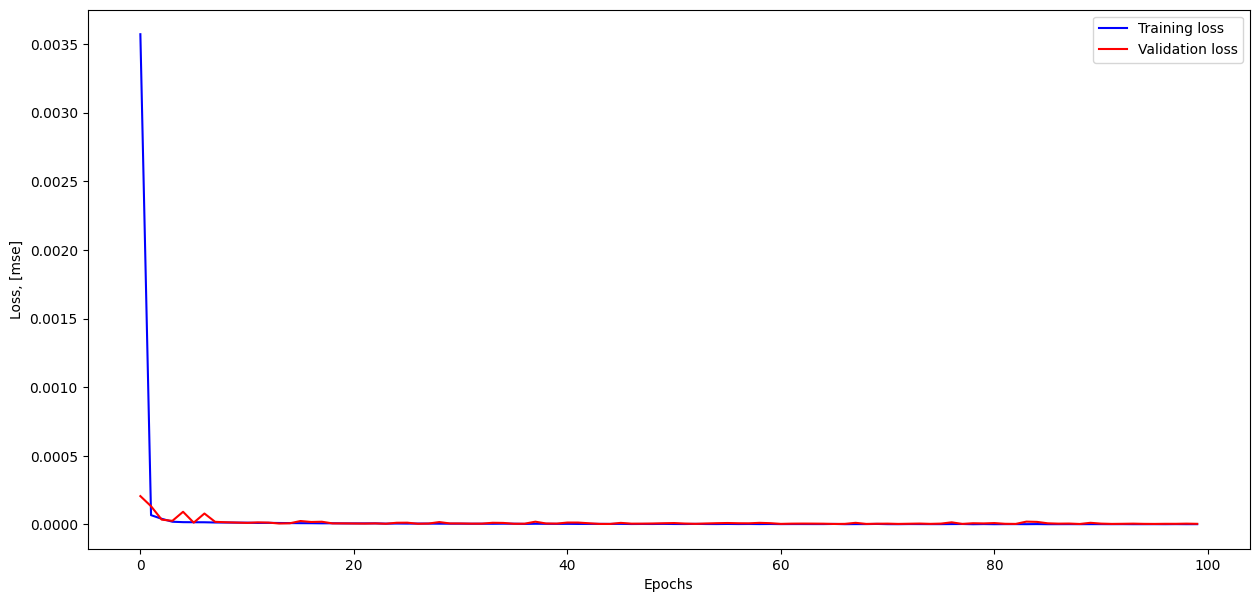

In [9]:
plt.subplots(figsize=(15,7))

plt.plot(eval.history['loss'],'b',label='Training loss')
plt.plot(eval.history['val_loss'],'r',label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')

plt.show()

### Storing Dataframe for Error :

4983/4983 [==============================] - 8s 2ms/step


C:\Users\AmineBadri\AppData\Local\Temp\ipykernel_12348\1137672398.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scored['Loss_mae'],


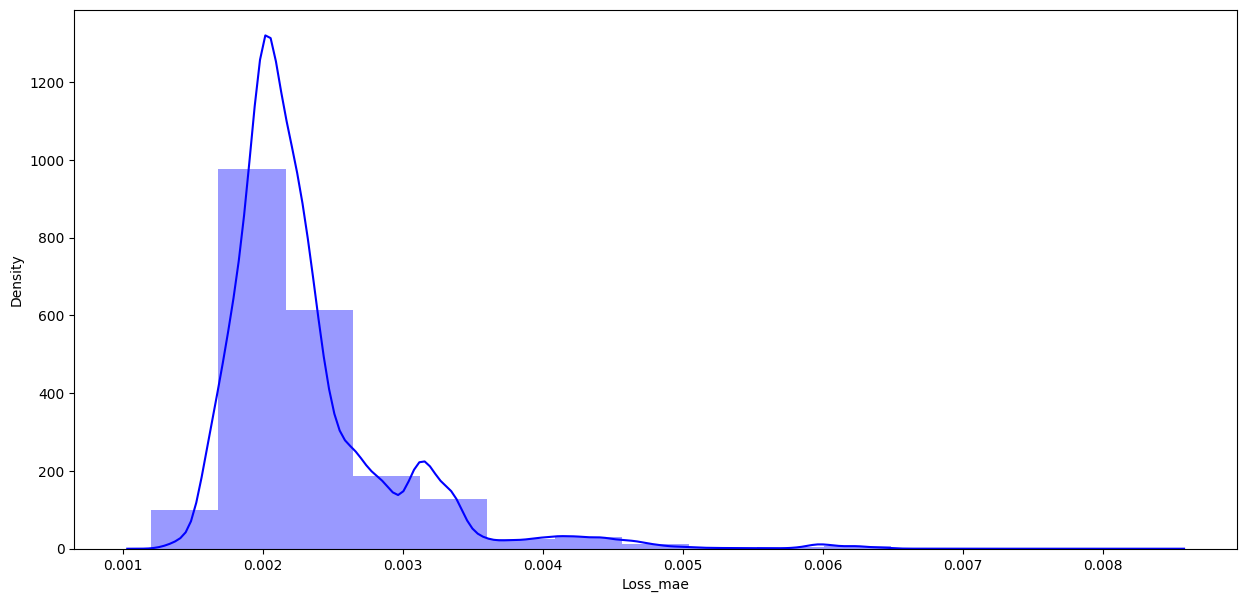

In [6]:
# Reconstructing training data : 
X_pred = autoencoder.predict(np.array(X_train))

# Storing the predictions in a data frame : 
X_pred = pd.DataFrame(X_pred,
                         columns= main_df.columns,
                         )
X_pred.index = pd.DataFrame(X_train).index

#Dataframe to get the difference of predicted data and real data. 
scored = pd.DataFrame(index=pd.DataFrame(X_train).index)

#Returning the mean of the loss for each column
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)

# plot 
plt.subplots(figsize=(15,7))
sns.distplot(scored['Loss_mae'],
             bins = 15, 
             kde= True,
            color = 'blue');


#### Plotting error for entire set of data: 

33216/33216 [==============================] - 43s 1ms/step
Thershold:  0.014938448728384318


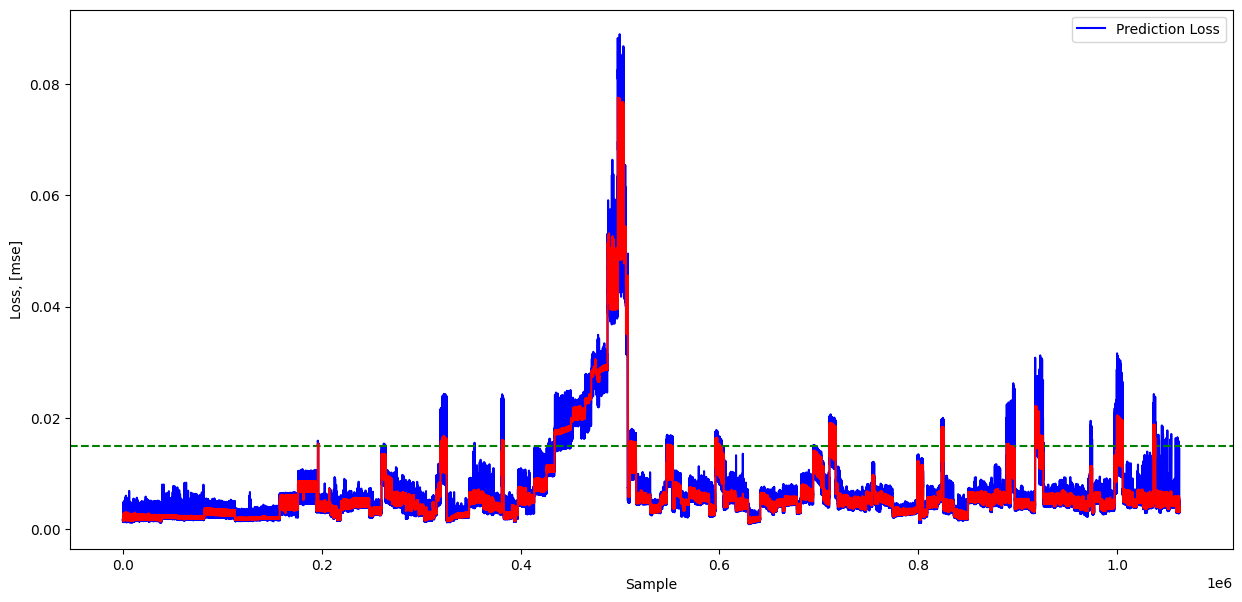

In [7]:

#Reconstructing full data
X_pred = autoencoder.predict(np.array(X))
X_pred = pd.DataFrame(X_pred,columns=main_df.columns)
X_pred.index = pd.DataFrame(X).index

#Returning mean of the losses for each column and putting it in a dataframe
scored = pd.DataFrame(index=pd.DataFrame(X).index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X), axis = 1)

#Threhhold value of error;
threshold = np.mean(scored['Loss_mae']) + np.std(scored['Loss_mae'])
print("Thershold: ", threshold)

#Plot size
plt.subplots(figsize=(15,7))


#Saving dataframe
scored.to_csv('AutoEncoder_loss.csv')

#Plot
plt.plot(scored['Loss_mae'],'b',label='Prediction Loss')

plt.legend(loc='upper right')
plt.xlabel('Sample')
plt.ylabel('Loss, [mse]')

#Threshold line
plt.axhline(y=threshold, color='g', linestyle='--')

# Moving mean : 
plt.plot(scored.index, scored['Loss_mae'].rolling(100).mean(), 'r', markersize=1, label = 'Moving Mean')

In [ ]:
# We notice that only a few point of loss are over the threshold value, we will consider only the over exaggerated ones to be determined error
# Although we are considering all anomalies when making the RUL of the system; 
# We produce a moving mean to make it easier to read, it turns out using that as a metric for anomalies is better. it lessens the load and shows us the most important or prominent & concerning anomalies.

In [8]:
# monthly analysis of error ;

# making Month Dataframe
month_use = pd.read_csv("Organized_Dataset.csv")
months = pd.DataFrame(month_use["Month"],
                        index=month_use.index)
months.columns= ["Month"]
#adding it to loss Dataframe; 
scored = pd.concat([scored, months], axis=1)


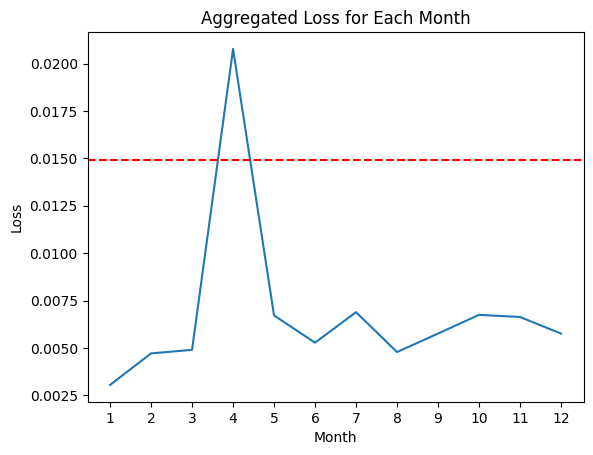

In [9]:


# Group by 'Month' and calculate the mean loss for each month
monthly_loss = scored.groupby('Month')['Loss_mae'].mean()

# Plotting the aggregated loss values for each month
plt.plot(monthly_loss.index, monthly_loss.values)
plt.title("Aggregated Loss for Each Month")
plt.xlabel("Month")
plt.ylabel("Loss")
plt.xticks(monthly_loss.index)
plt.axhline(y=threshold, color='r', linestyle='--')
plt.show()

In [ ]:
# We can see here that the mean loss of Month_4 is the biggest, and by the way the losses has returned to normal at the end of it:
# i suppose that they have changed the blades, considering there isn't another explanation to why the machine acted normally again.
# obviously the reason only Month 4 has by passed the threshold is becuase we used a mean error for the graph, and month 4 had the largest values of error, where the other months had only instances of error, like month 11 and 10 from the previous graph 

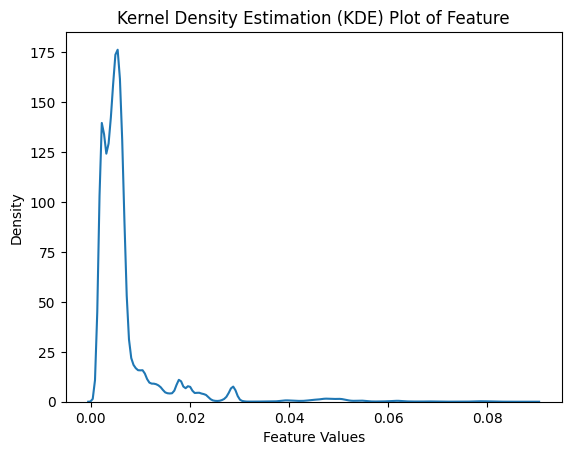

In [10]:
sns.kdeplot(scored['Loss_mae'])
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) Plot of Feature')
plt.show()
# We can see here the distribution of error through our data, its quite rare that our data has anomalies, evidently that's an effect of the blade wearing out. 
# With that being the case it'seasier to indentify those anoamlies because the rarer they are, the more they stand out.

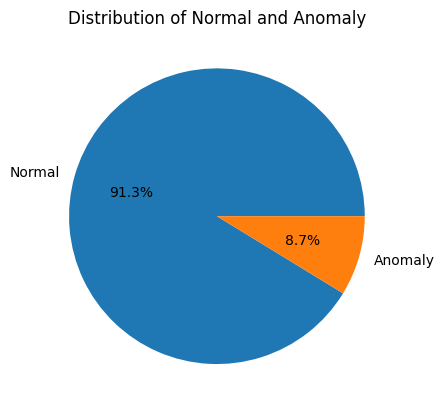

In [11]:
main_df["AutoEnc_loss"] = scored["Loss_mae"]
main_df["Anomaly"] = 0

main_df.loc[main_df['AutoEnc_loss'] > threshold, 'Anomaly'] = 1

# Count the number of instances under and over the threshold
count = main_df['Anomaly'].value_counts()

# Create labels for the pie chart
labels = ['Normal', 'Anomaly']

# Create a pie chart
plt.pie(count, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Normal and Anomaly')

# Display the chart
plt.show()

### we can see here that the percentage of anomalies is very low : 

C:\Users\AmineBadri\AppData\Local\Temp\ipykernel_12348\1080348581.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((month_df['AutoEnc_loss']), bins=15)


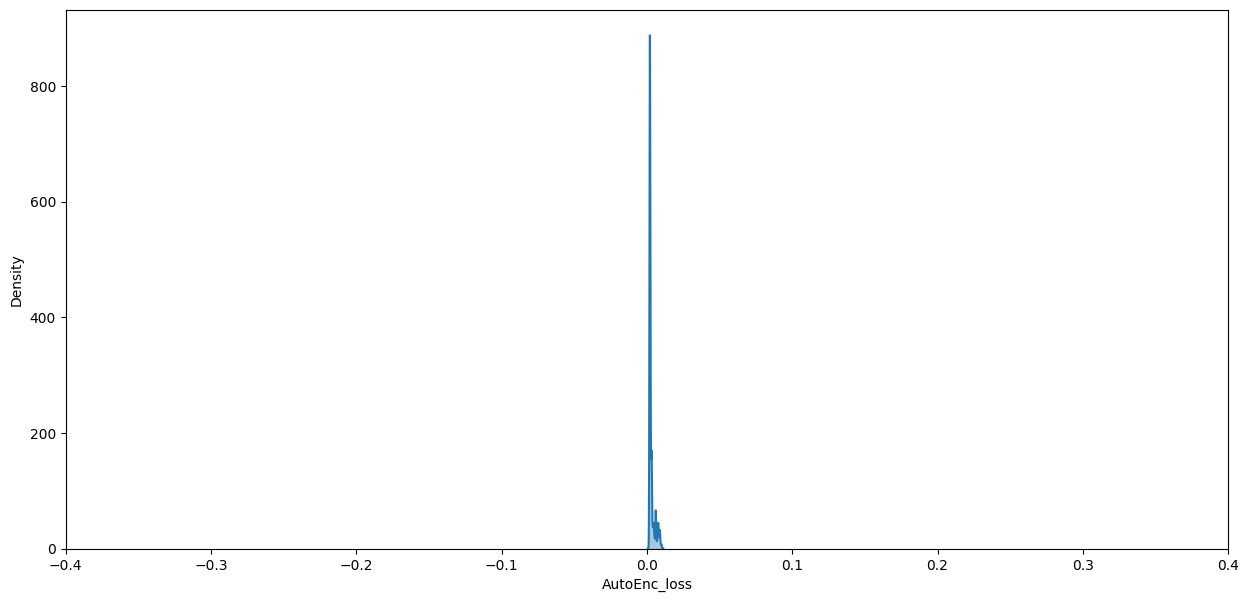

C:\Users\AmineBadri\AppData\Local\Temp\ipykernel_12348\1080348581.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((month_df['AutoEnc_loss']), bins=15)


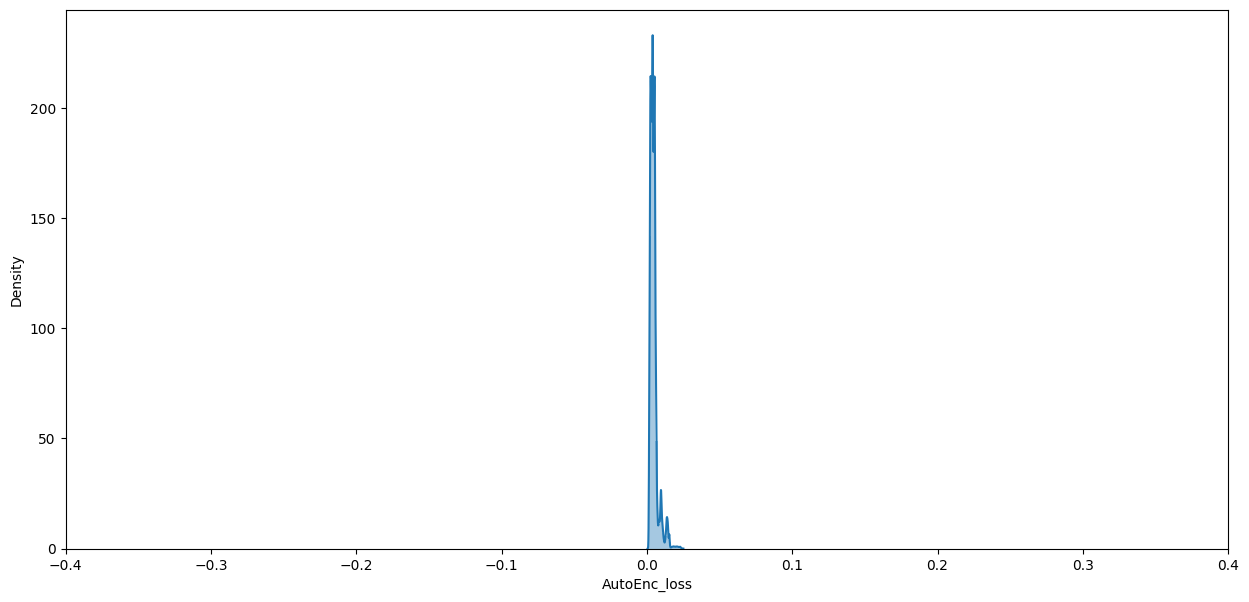

C:\Users\AmineBadri\AppData\Local\Temp\ipykernel_12348\1080348581.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((month_df['AutoEnc_loss']), bins=15)


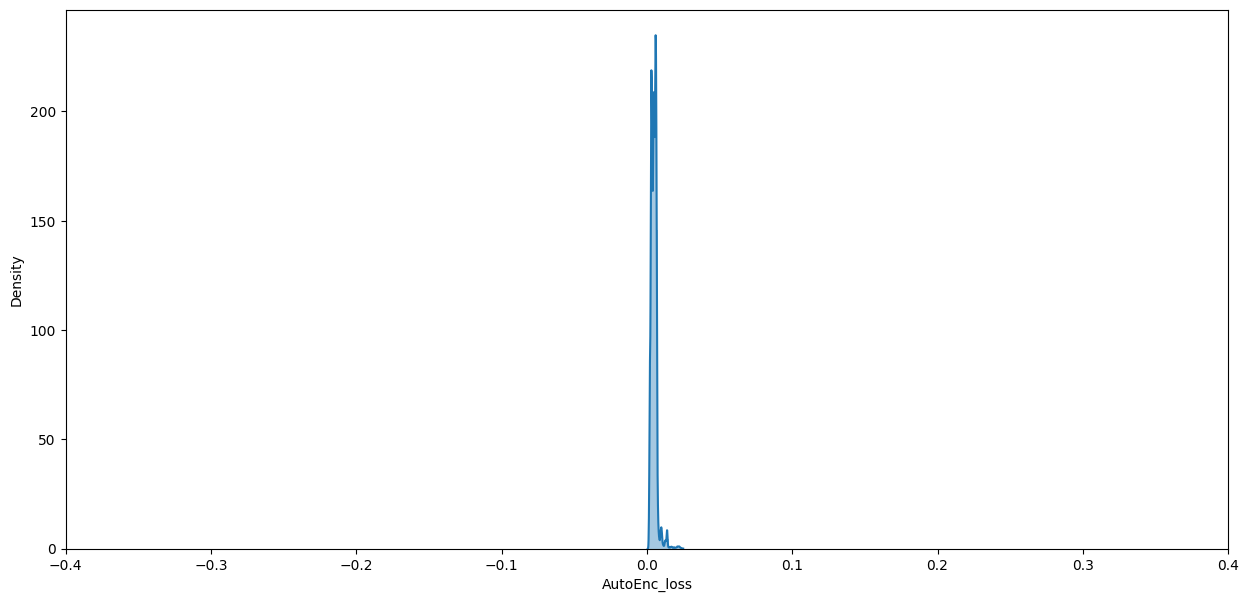

C:\Users\AmineBadri\AppData\Local\Temp\ipykernel_12348\1080348581.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((month_df['AutoEnc_loss']), bins=15)


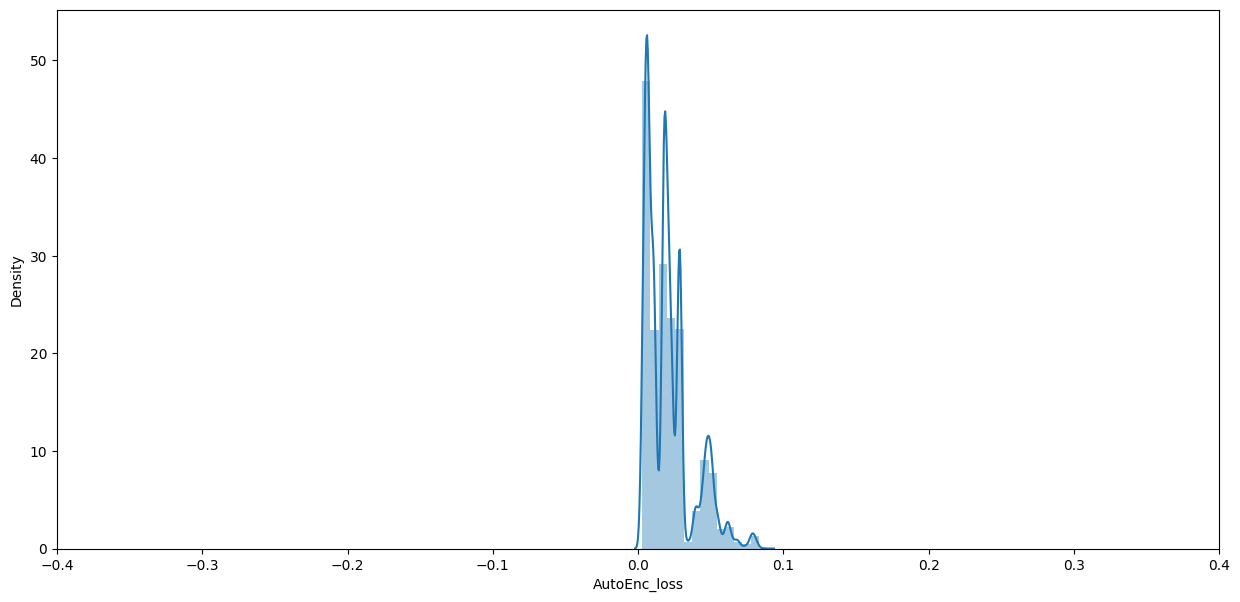

C:\Users\AmineBadri\AppData\Local\Temp\ipykernel_12348\1080348581.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((month_df['AutoEnc_loss']), bins=15)


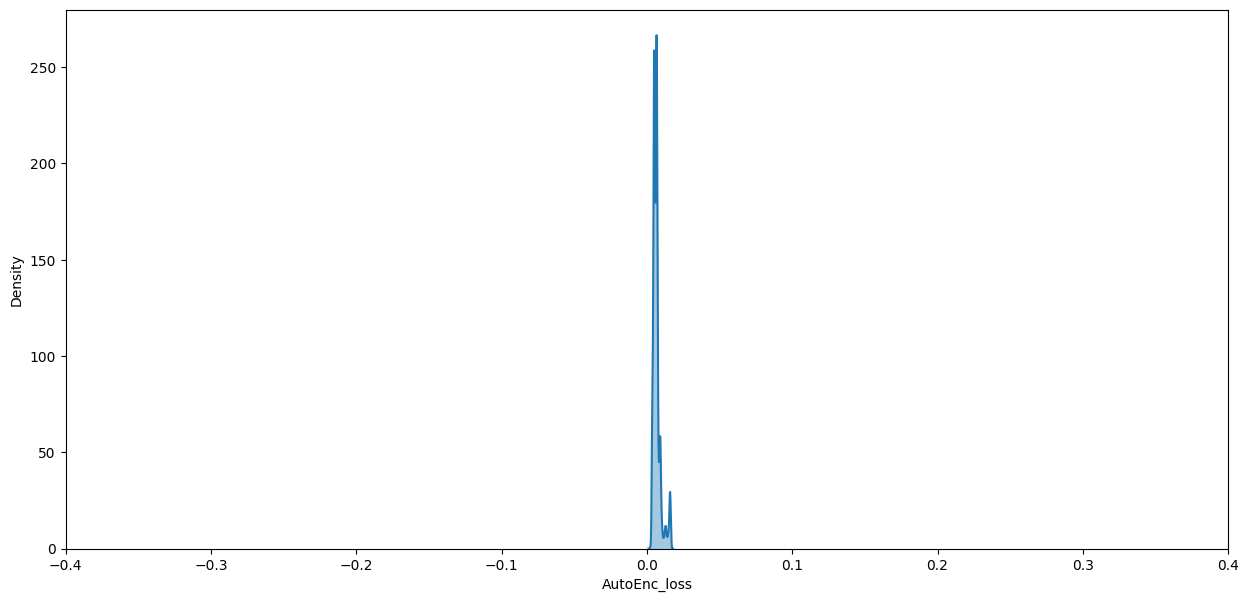

C:\Users\AmineBadri\AppData\Local\Temp\ipykernel_12348\1080348581.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((month_df['AutoEnc_loss']), bins=15)


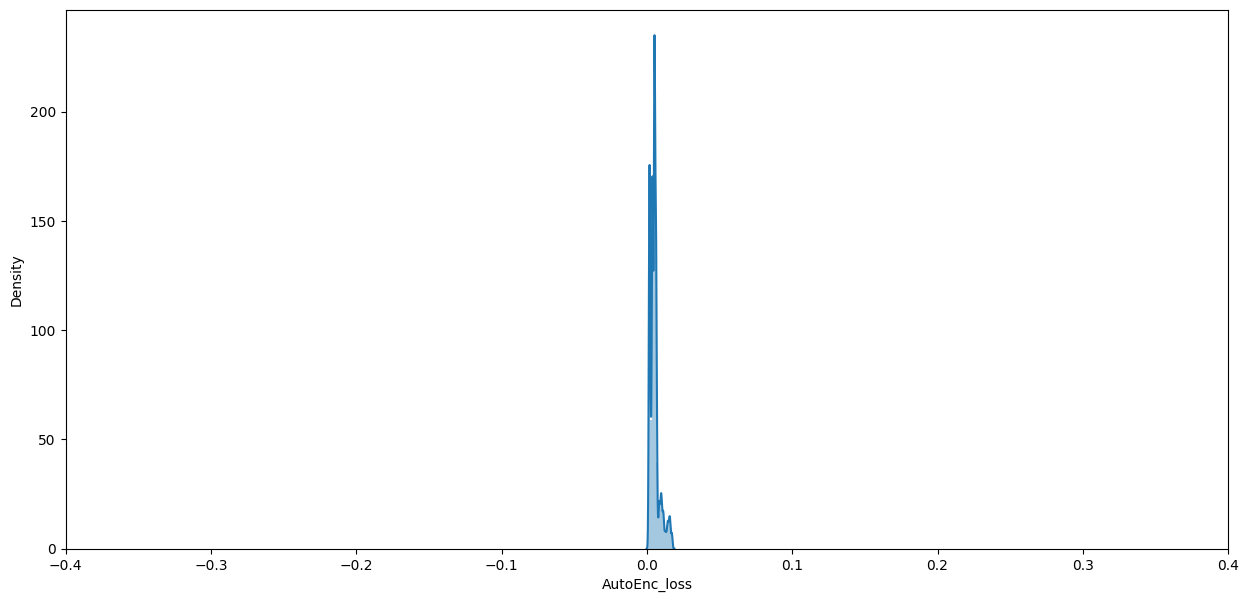

C:\Users\AmineBadri\AppData\Local\Temp\ipykernel_12348\1080348581.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((month_df['AutoEnc_loss']), bins=15)


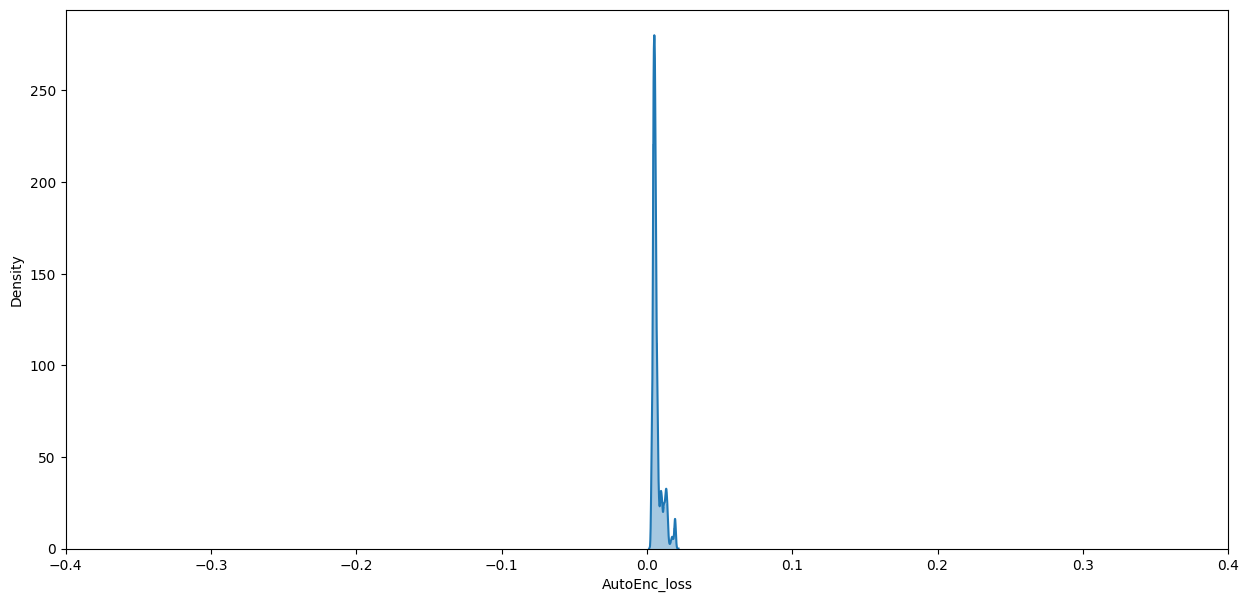

C:\Users\AmineBadri\AppData\Local\Temp\ipykernel_12348\1080348581.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((month_df['AutoEnc_loss']), bins=15)


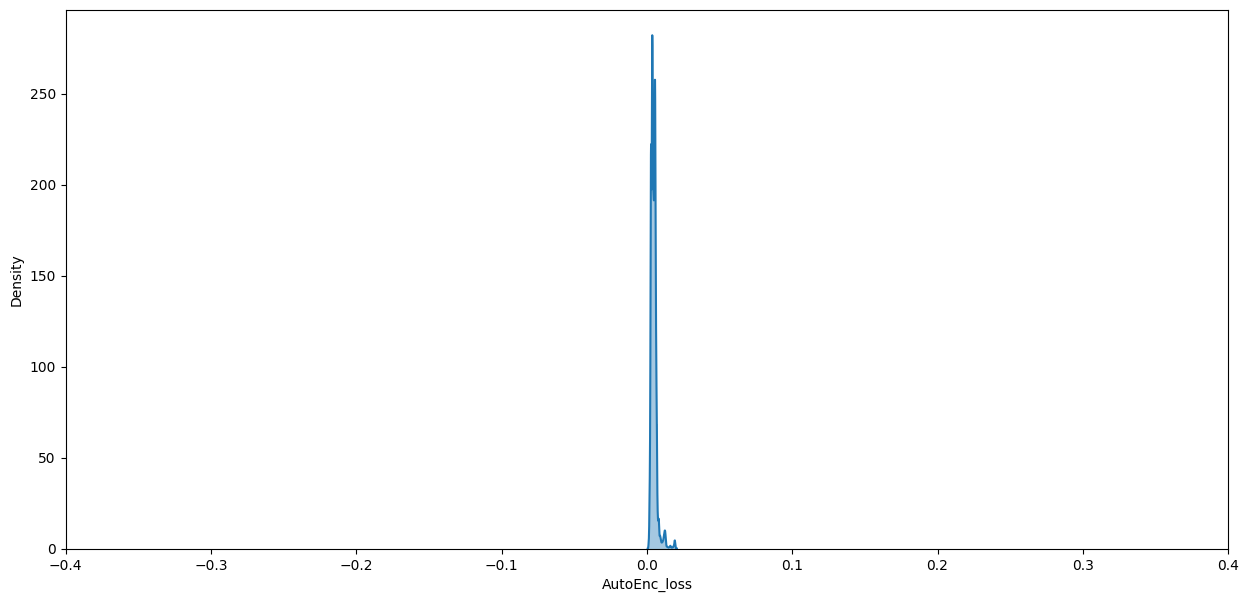

C:\Users\AmineBadri\AppData\Local\Temp\ipykernel_12348\1080348581.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((month_df['AutoEnc_loss']), bins=15)


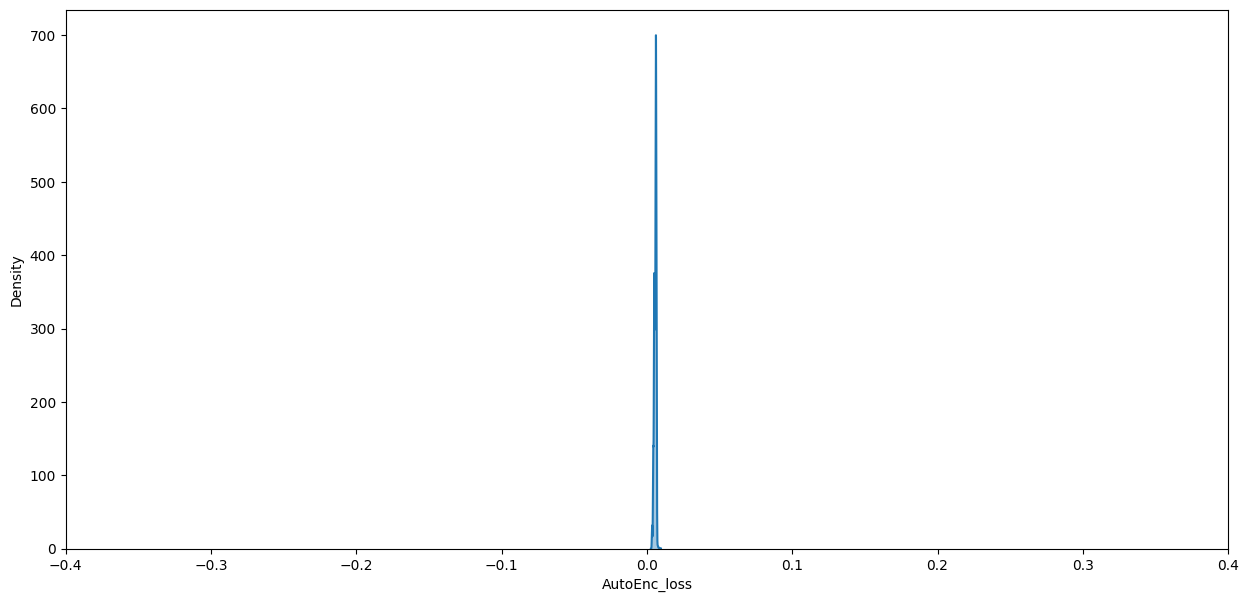

C:\Users\AmineBadri\AppData\Local\Temp\ipykernel_12348\1080348581.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((month_df['AutoEnc_loss']), bins=15)


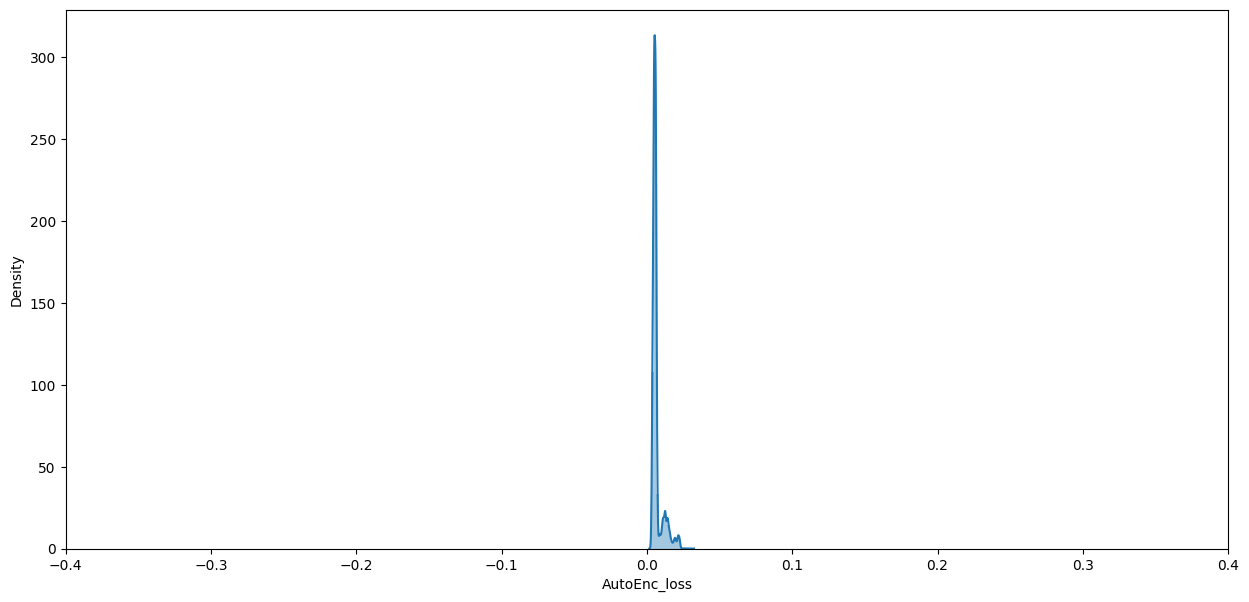

C:\Users\AmineBadri\AppData\Local\Temp\ipykernel_12348\1080348581.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((month_df['AutoEnc_loss']), bins=15)


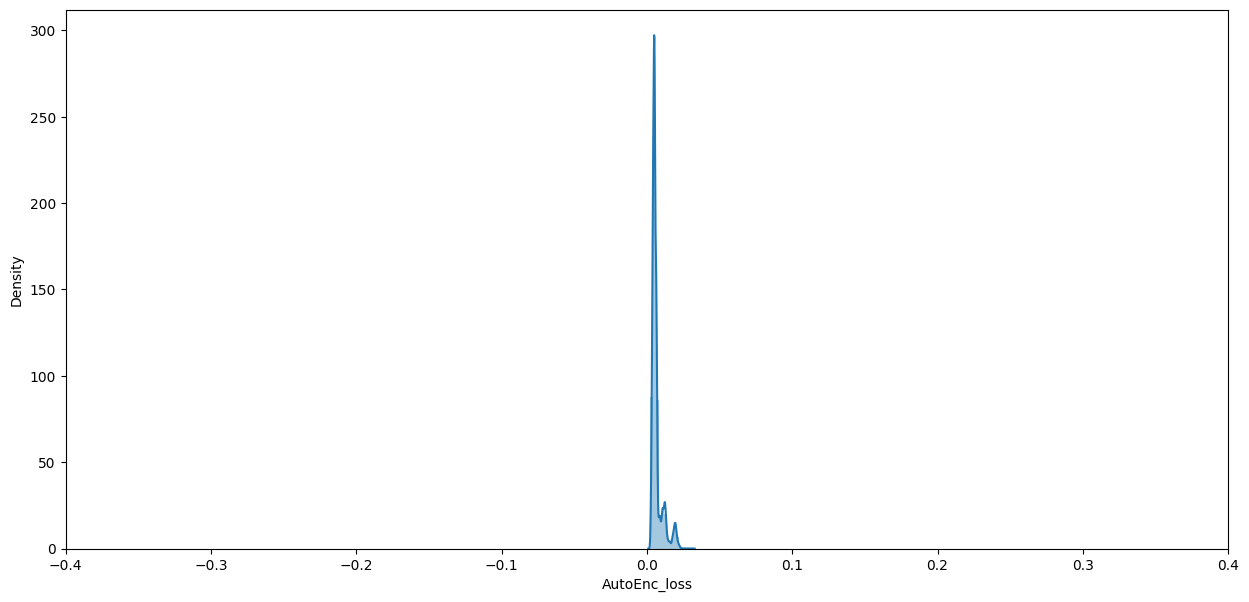

C:\Users\AmineBadri\AppData\Local\Temp\ipykernel_12348\1080348581.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((month_df['AutoEnc_loss']), bins=15)


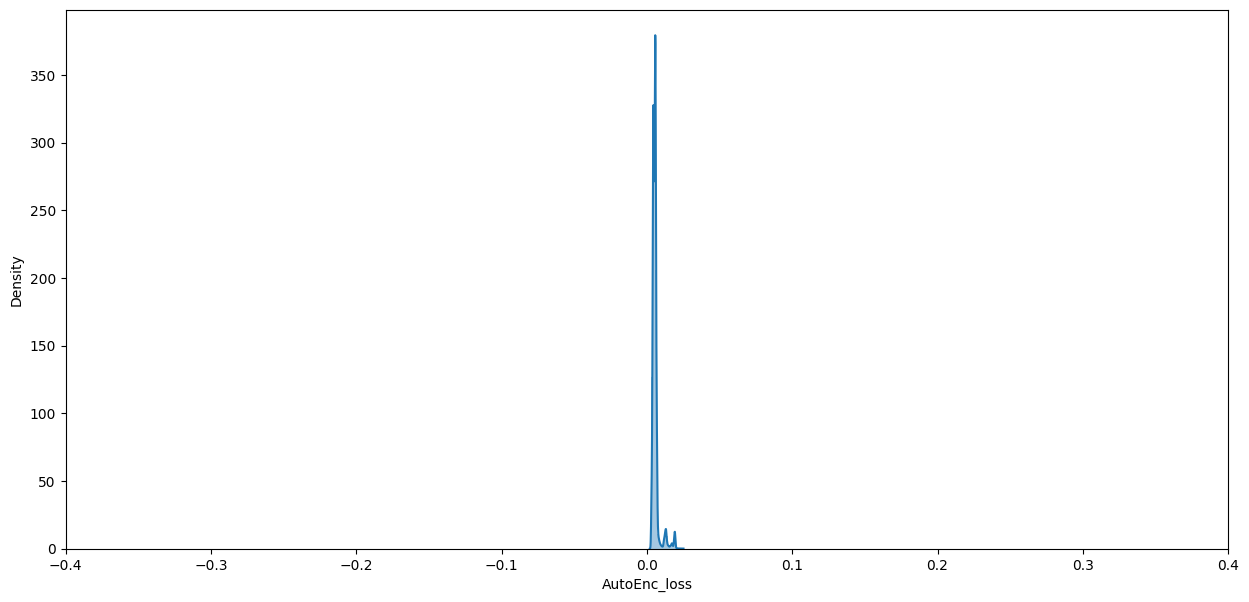

In [12]:
main_df["Month"] = scored["Month"]
months = main_df['Month'].dropna().unique()

for month in months:
    month_df = main_df.groupby('Month').get_group(month)
    
    
    
    plt.subplots(figsize=(15,7))
    sns.distplot((month_df['AutoEnc_loss']), bins=15)
    #X axis limits
    plt.xlim([-0.4,0.4])
    plt.show()


In [3]:
scored = pd.read_csv("AutoEncoder_loss.csv")
main_df = pd.read_csv("Organized_Dataset.csv")
main_df["Year"] = 2022
datetime_str = main_df ['Year'].astype(str) + '-' + main_df ['Month'].astype(str) + '-' + main_df ['Day'].astype(str) + ' ' + main_df ['Hour'].astype(str) + '-' + main_df ['Minute'].astype(str) + '-' + main_df ['Second'].astype(str)

# Transforming our error data set index into date time format for time series forecasting of error using LSTM RNN : 

scored['datetime'] = pd.to_datetime(datetime_str, format='%Y-%m-%d %H-%M-%S',errors='coerce')
scored = scored.drop(["Unnamed: 0"],axis=1)
scored

,Loss_mae,datetime
0,0.001756,2022-01-04 18:41:48
1,0.001759,2022-01-04 18:41:48
2,0.001782,2022-01-04 18:41:48
3,0.001763,2022-01-04 18:41:48
4,0.001863,2022-01-04 18:41:48
...,...,...
1062907,0.004732,2022-12-28 18:59:09
1062908,0.004737,2022-12-28 18:59:09
1062909,0.004897,2022-12-28 18:59:09
1062910,0.004778,2022-12-28 18:59:09


In [ ]:
# as we can see, month 4 has the highest loss distribution followed by month 11, we can see that by the tail of plot, which makes sense given the period of work done by one blade
# this insight can help us not only in detecting anomalies in the system, but also predicting them;

In [4]:
scored.set_index('datetime', inplace=True)
scored

,Loss_mae
datetime,
2022-01-04 18:41:48,0.001756
2022-01-04 18:41:48,0.001759
2022-01-04 18:41:48,0.001782
2022-01-04 18:41:48,0.001763
2022-01-04 18:41:48,0.001863
...,...
2022-12-28 18:59:09,0.004732
2022-12-28 18:59:09,0.004737
2022-12-28 18:59:09,0.004897


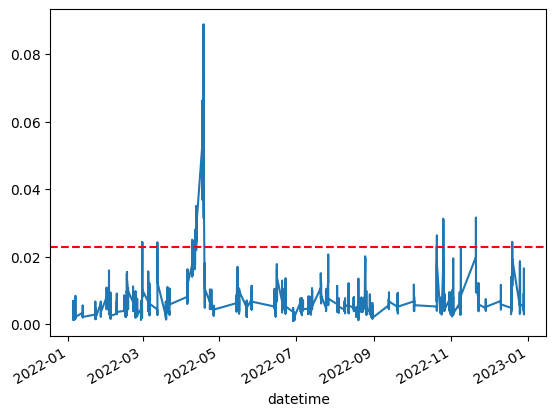

In [5]:
scored["Loss_mae"].plot()
threshold = np.mean(scored['Loss_mae']) + 2 * np.std(scored['Loss_mae'])
plt.axhline(y=threshold, color='r', linestyle='--')

In [6]:
# Making a function that converts our data in a manner suitable for LSTM usage : [x1,x2,x3,x4,x5] [Y]
temp = scored["Loss_mae"]
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [a for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)
WINDOW_SIZE = 5
X,y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((1062907, 5), (1062907,))

In [7]:
# We split our data into training, validation and testing; we are gonna choose entire first life time for training
X_train1, y_train1 = X[:510000], y[:510000]
X_val1, y_val1 = X[510000:560000], y[510000:560000]
X_test1, y_test1 = X[560000:], y[560000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((510000, 5), (510000,), (50000, 5), (50000,), (502907, 5), (502907,))

In [8]:
# import some useful libraries that we are going to use to predict failure time (RUL)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [9]:
# Building the LSTM model for time-series forcasting of our error : 
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(128))
model1.add(Dense(64,"relu"))
model1.add(Dense(8, "relu"))
model1.add(Dense(1, "linear"))

model1.summary()


# Set Python random seed
import random


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 75345 (294.32 KB)
Trainable params: 75345 (294.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001))

In [11]:
history = model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1),batch_size=32, epochs=10 )

Epoch 1/10
15938/15938 [==============================] - 102s 6ms/step - loss: 7.3388e-07 - val_loss: 1.3588e-07
Epoch 2/10
15938/15938 [==============================] - 117s 7ms/step - loss: 2.2646e-07 - val_loss: 1.7675e-07
Epoch 3/10
15938/15938 [==============================] - 119s 7ms/step - loss: 2.0855e-07 - val_loss: 1.1577e-07
Epoch 4/10
15938/15938 [==============================] - 115s 7ms/step - loss: 2.0090e-07 - val_loss: 1.1771e-07
Epoch 5/10
15938/15938 [==============================] - 106s 7ms/step - loss: 1.9455e-07 - val_loss: 1.1100e-07
Epoch 6/10
15938/15938 [==============================] - 123s 8ms/step - loss: 1.8964e-07 - val_loss: 2.0637e-07
Epoch 7/10
15938/15938 [==============================] - 139s 9ms/step - loss: 1.8484e-07 - val_loss: 1.1750e-07
Epoch 8/10
15938/15938 [==============================] - 152s 10ms/step - loss: 1.8146e-07 - val_loss: 1.7237e-07
Epoch 9/10
15938/15938 [==============================] - 100s 6ms/step - loss: 1.7931e

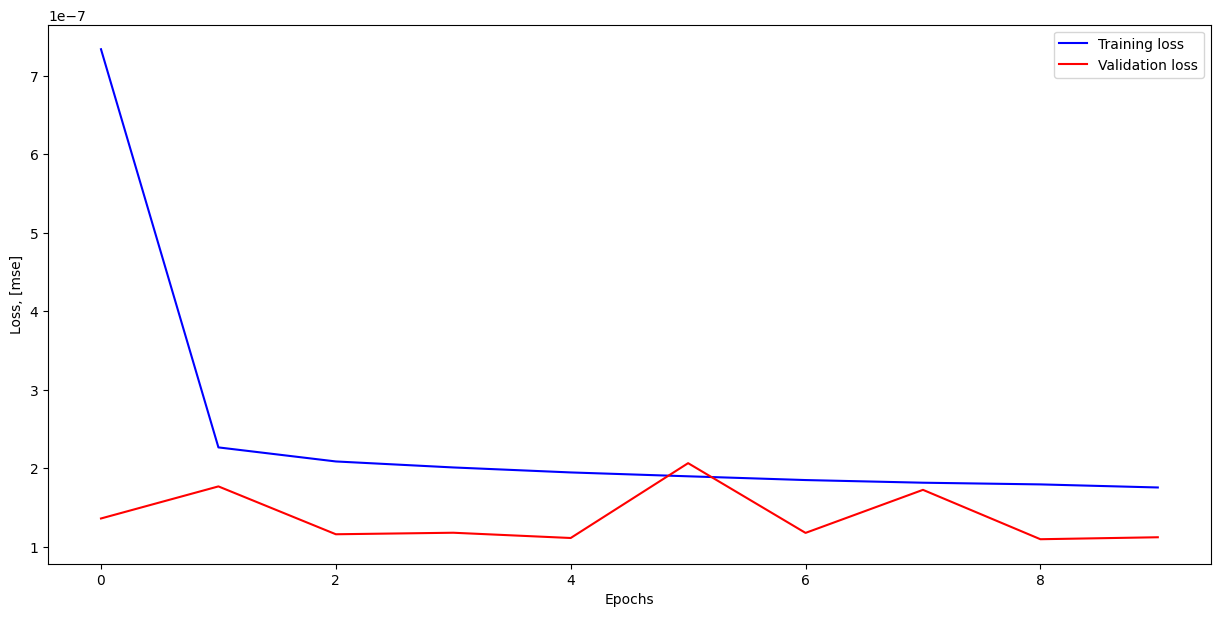

In [12]:
# Plotting the validation and training loss : ( focusing on the validation loss more as a metric for reliability)

plt.subplots(figsize=(15,7))

plt.plot(history.history['loss'],'b',label='Training loss')
plt.plot(history.history['val_loss'],'r',label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')

plt.show()

In [13]:
# Testing the model on trainig data :

train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

15938/15938 [==============================] - 40s 3ms/step


,Train Predictions,Actuals
0,0.001863,0.001783
1,0.001838,0.001795
2,0.001834,0.001864
3,0.001875,0.001893
4,0.001910,0.001935
...,...,...
509995,0.010385,0.010497
509996,0.010503,0.010445
509997,0.010519,0.011107
509998,0.010933,0.010698


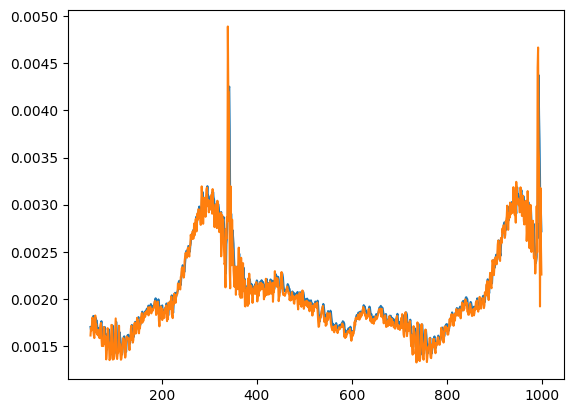

In [14]:
# plotting both actual values of training data (orange) and predicted values of training data (blue)

import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:1000])
plt.plot(train_results['Actuals'][50:1000])

In [15]:
# Testing the model on validation data : (unseen data)

val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

1563/1563 [==============================] - 4s 3ms/step


,Val Predictions,Actuals
0,0.010625,0.010355
1,0.010506,0.010429
2,0.010505,0.010674
3,0.010655,0.010978
4,0.010905,0.010637
...,...,...
49995,0.005458,0.005364
49996,0.005434,0.005671
49997,0.005614,0.005889
49998,0.005820,0.005739


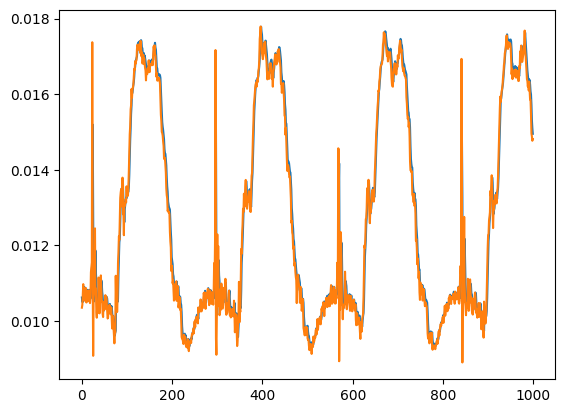

In [16]:
# Plotting both actual values of validation data (orange) and predicted values of validation data (blue)


plt.plot(val_results['Val Predictions'][:1000])
plt.plot(val_results['Actuals'][:1000])
val_results.to_csv("val_results.csv")

In [17]:
# Testing the model on testing data:

test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

15716/15716 [==============================] - 40s 3ms/step


,Test Predictions,Actuals
0,0.005944,0.006144
1,0.006106,0.006173
2,0.006186,0.006316
3,0.006305,0.006429
4,0.006421,0.006501
...,...,...
502902,0.004702,0.004732
502903,0.004752,0.004737
502904,0.004775,0.004897
502905,0.004882,0.004778


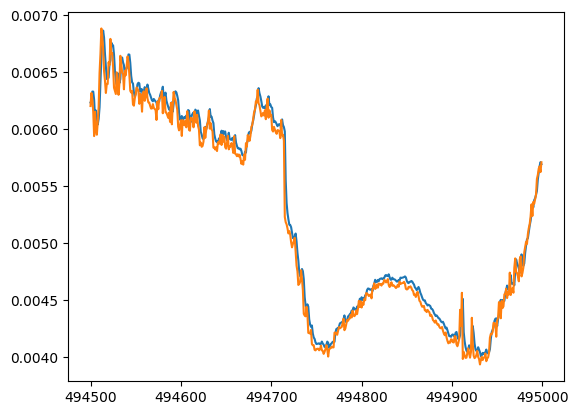

In [18]:
# Plotting both actual values of Testing data (orange) and predicted values of Testing data (blue)


plt.plot(test_results['Test Predictions'][494500:495000])
plt.plot(test_results['Actuals'][494500:495000])

In [19]:
# predicting the remaining useful life of the system (RUL):

# First we make a copy dataframe of the loss function, than we add the column of predictions, so it's easier to plot later 
# and also it makes it easier to identify the time of failure when we use tha date time index in the "scored" dataframe we used earlier 

scored_2 = scored.copy()
scored_2["Prediction"] = 0
scored_2["Prediction"][:560000] = scored["Loss_mae"][:560000]
scored_2["Prediction"][560000:560000+502907] = y_test1
scored_2


C:\Users\AmineBadri\AppData\Local\Temp\ipykernel_6884\2090901127.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scored_2["Prediction"][:560000] = scored["Loss_mae"][:560000]


,Loss_mae,Prediction
datetime,,
2022-01-04 18:41:48,0.001756,0.001756
2022-01-04 18:41:48,0.001759,0.001759
2022-01-04 18:41:48,0.001782,0.001782
2022-01-04 18:41:48,0.001763,0.001763
2022-01-04 18:41:48,0.001863,0.001863
...,...,...
2022-12-28 18:59:09,0.004732,0.000000
2022-12-28 18:59:09,0.004737,0.000000
2022-12-28 18:59:09,0.004897,0.000000


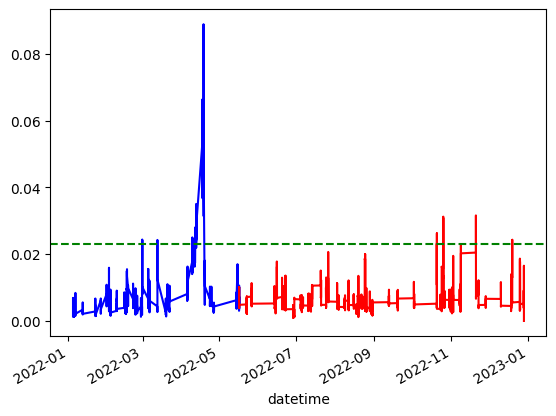

In [20]:
# Visual representation of the predicted data (red), and actual data(blue)

scored_2["Prediction"][:560000].plot(color="blue")
scored_2["Prediction"][560000:].plot(color="red")
threshold = np.mean(scored['Loss_mae']) + 2 * np.std(scored['Loss_mae'])
plt.axhline(y=threshold, color='g', linestyle='--')

In [21]:
# Script to leverage the date time format index to find the RUL, or Date to failure in this case : 

for value in scored_2["Prediction"][560000:]:
    if value >= threshold:
        datetime_prediction = scored_2.index[scored_2['Prediction'] == value][0]
        failure_date = datetime_prediction
        break
print("Predicted date time of failure:" )
print(failure_date)

Predicted date time of failure:
2022-10-20 15:39:37


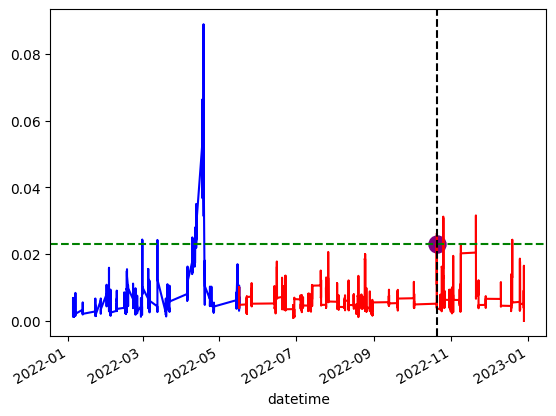

In [22]:
# Plotting the given input Blue, and the prediction of error Red 
scored_2["Prediction"][:560000].plot(color="blue")
scored_2["Prediction"][560000:].plot(color="red")

# Plotting threshhold line for visibility of failure : 
threshold = np.mean(scored['Loss_mae']) + 2 * np.std(scored['Loss_mae'])

# Highlighting the point of faliure on our plot : 
plt.axhline(y=threshold, color='g', linestyle='--')
plt.axvline(x=failure_date, color='black', linestyle='--')
plt.scatter(failure_date, threshold, color='purple', marker='o', s=150)
